# Adult Census Data Prediction
### Tenzin Kunsang, January 2021

## Table of contents
- Introduction
- Data Cleanup
- Data Visualization and Feature Selection
- Data Preprocessing
- Prediction: Testing out some algorithms for Income Prediction
    - Decision Tree
    - ADABoost Classifier with Decision Trees
    - Logistic Regression
    - K-Nearest Neighbors (KNN)
    - Support Vector Machine (SVM)
    - Random Forest Classifier 
    - Deep Learning
- Conclusion

## Introduction <a id="introduction"></a>

## Data Cleanup

In [121]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from graphviz import Source
from sklearn import tree
from subprocess import check_call
from sklearn import metrics
%matplotlib inline 

In [122]:
df= pd.read_csv("adultData.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [123]:
columns = ['age', 'workclass', 'finalWt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hrsPerWeek', 'nativeCountry', 'income']
df.columns = columns
df.head()

,age,workclass,finalWt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [124]:
df.shape

(32561, 15)

In [125]:
df.dtypes

age               int64
workclass        object
finalWt           int64
education        object
educationNum      int64
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hrsPerWeek        int64
nativeCountry    object
income           object
dtype: object

In [126]:
df['workclass'] = df['workclass'].str.replace(" ","")
df['education'] = df['education'].str.replace(" ","")
df['maritalStatus'] = df['maritalStatus'].str.replace(" ","")
df['occupation'] = df['occupation'].str.replace(" ","")
df['relationship'] = df['relationship'].str.replace(" ","")
df['race'] = df['race'].str.replace(" ","")
df['sex'] = df['sex'].str.replace(" ","")
df['nativeCountry'] = df['nativeCountry'].str.replace(" ","")
df['income'] = df['income'].str.replace(" ","")

In [127]:
df.describe(include = 'all')

,age,workclass,finalWt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [128]:
print(df.isnull().sum())

age              0
workclass        0
finalWt          0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hrsPerWeek       0
nativeCountry    0
income           0
dtype: int64


In [129]:
print(df['workclass'].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [130]:
print(df['occupation'].value_counts())

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [131]:
#check to see if there are any rows where the workclass is known but occupation is unknown 
#because if workclass exists, it is safe to assume that the row must have an occupation

occupationUnknown = df.loc[df.occupation == '?']
occupationUnknown.loc[df.workclass != '?']

,age,workclass,finalWt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [132]:
#all the rows above have workclass = Never-worked (that makes up for the value count of 7 in Never-worked category of workclass)
#make 'Never-worked' = ? because redundant

df.loc[df.workclass == 'Never-worked', 'workclass'] = '?'

In [133]:
print(df['workclass'].value_counts())

#we end up with 1843 rows of ? in workclass as well as occupation

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1843
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64


In [134]:
#now let's check to see if there are any where occupation is known but workplace is unknown
occupationKnown = df.loc[df.occupation != '?']
occupationKnown.loc[df.workclass == '?']

#found that there's no such rows 

,age,workclass,finalWt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income


In [135]:
print(df['education'].value_counts())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [136]:
print(df['maritalStatus'].value_counts())

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalStatus, dtype: int64


In [137]:
print(df['nativeCountry'].value_counts())

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [138]:
print(df['sex'].value_counts())

Male      21790
Female    10771
Name: sex, dtype: int64


In [139]:
print(df['income'].value_counts())

<=50K    24720
>50K      7841
Name: income, dtype: int64


In [140]:
#Data is fairly clean but let's drop education because educationNum represents education level of each row, therefore it is redundant

df.drop(columns = ['education'], inplace = True)
df.head()

,age,workclass,finalWt,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Visualization and Feature Selection

In [22]:
#feature selection

#making income column numerical - creating a column "income" where: 
#if income is > 50K, the column value is 1 and if income is <= 50K, the column value will be 0

income = pd.get_dummies(df[['income']], prefix="", prefix_sep="")
income.drop(['<=50K'], axis = 1, inplace = True)
finaldf = df.drop(['income'], axis = 1)
finaldf['income'] = income
finaldf.head()

,age,workclass,finalWt,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


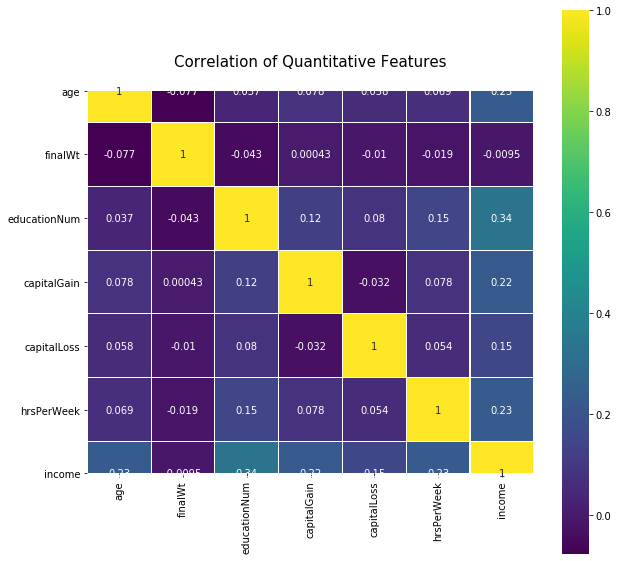

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Correlation of Quantitative Features', y=1.05, size=15)
sns.heatmap(finaldf.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

plt.show()


In [26]:
#let's remove finalwt because it has almost 0 correlation with income
finaldf.drop(['finalWt'], axis = 1, inplace = True)

In [27]:
finaldf.head()

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCountry,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [28]:
#let's one hot encode the remaining categorical columns to create correlation matrix graphs
# one hot encoding

onehot_finaldf = pd.get_dummies(finaldf)
onehot_finaldf.head()

,age,educationNum,capitalGain,capitalLoss,hrsPerWeek,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,nativeCountry_Portugal,nativeCountry_Puerto-Rico,nativeCountry_Scotland,nativeCountry_South,nativeCountry_Taiwan,nativeCountry_Thailand,nativeCountry_Trinadad&Tobago,nativeCountry_United-States,nativeCountry_Vietnam,nativeCountry_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


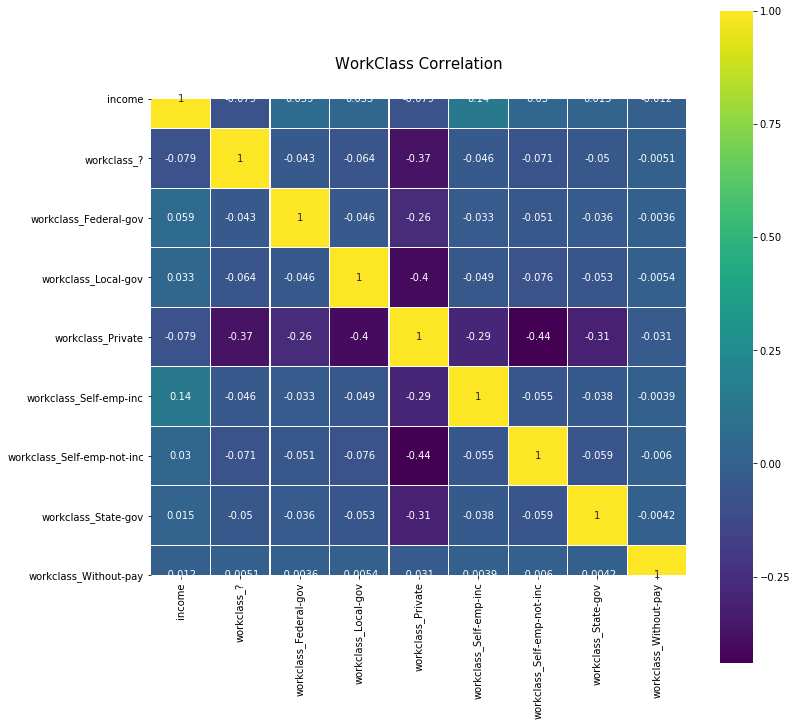

In [29]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('WorkClass Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('workclass') | onehot_finaldf.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

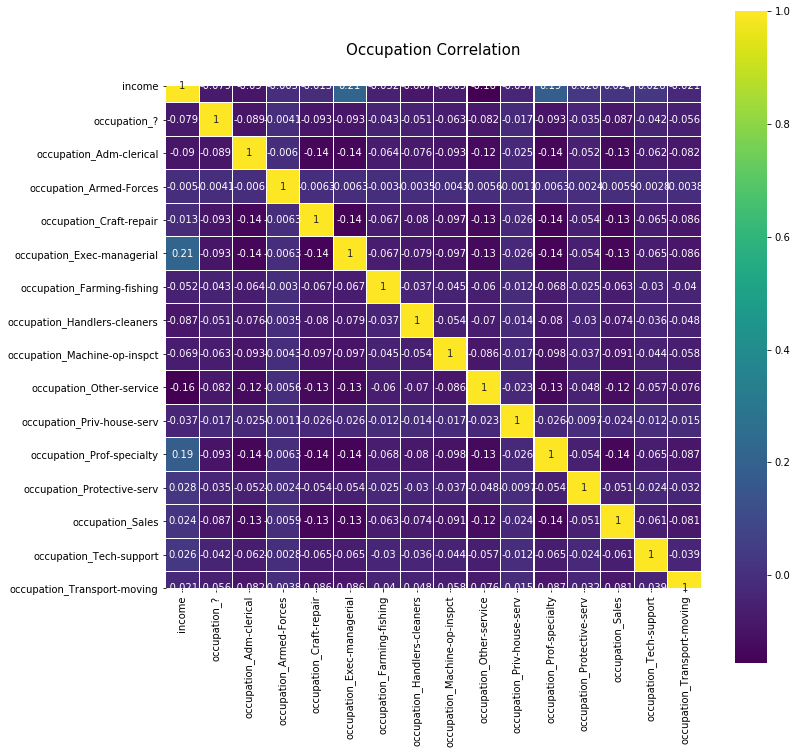

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Occupation Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('occupation') | onehot_finaldf.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

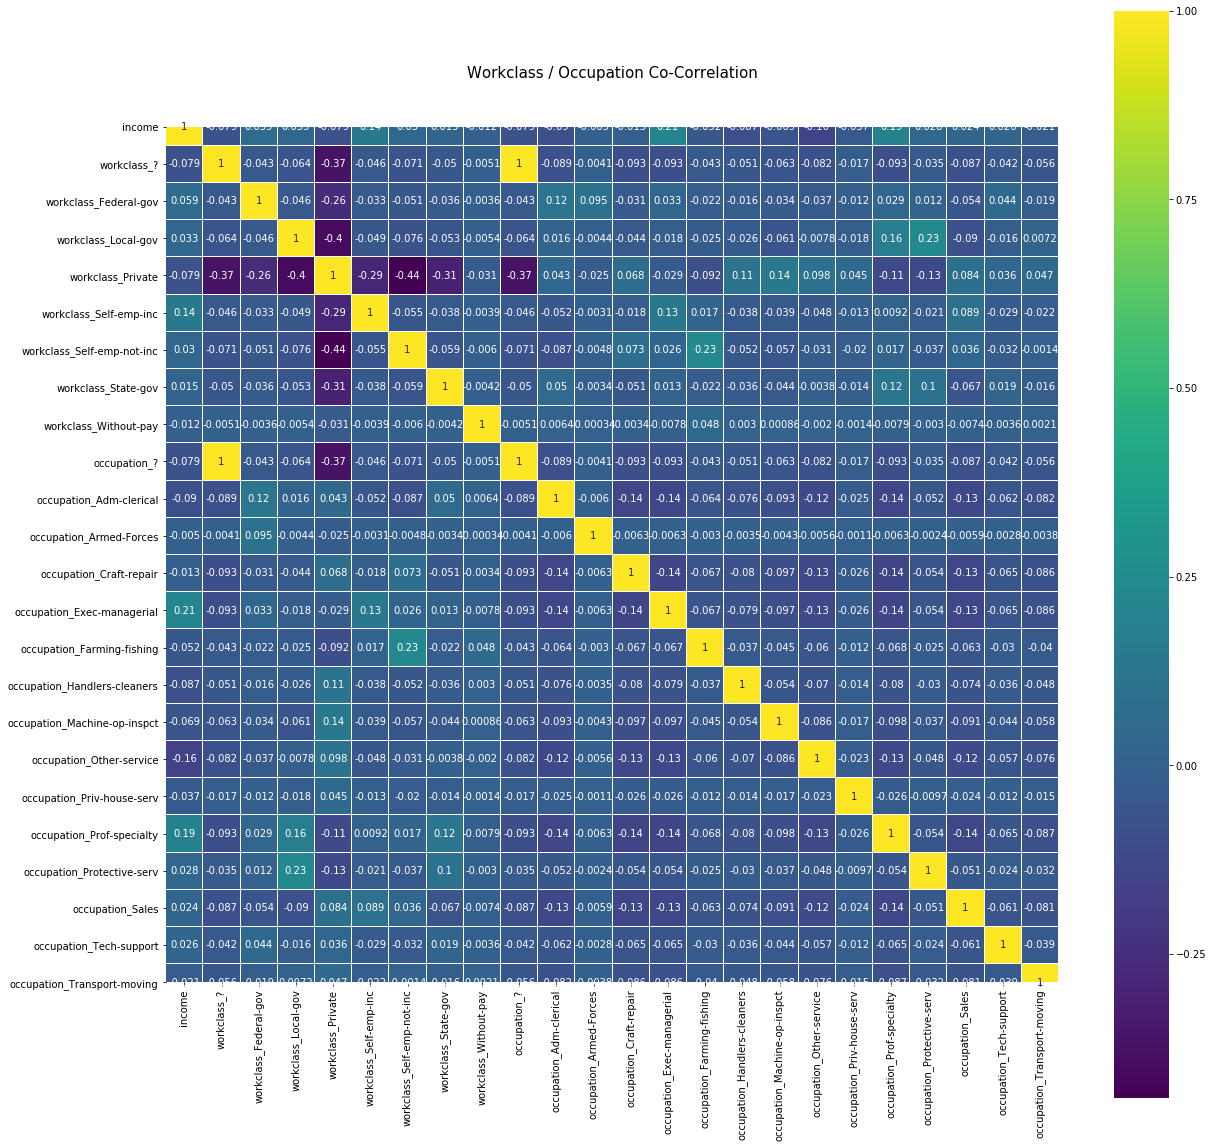

In [31]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Workclass / Occupation Co-Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('workclass') | onehot_finaldf.columns.str.contains('occupation') | onehot_finaldf.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [32]:
#it seems like workclass and occupation are co-correlated. one of the two features can be selected for our 
#final dataframe. we will choose occupation because workclass seems to be weakly correlated to income feature
#whereas occupation has a stronger correlation (positive or negative) with income
#therefore, let's drop workclass

onehot_finaldf.drop(onehot_finaldf.filter(regex='workclass').columns, axis=1, inplace = True)

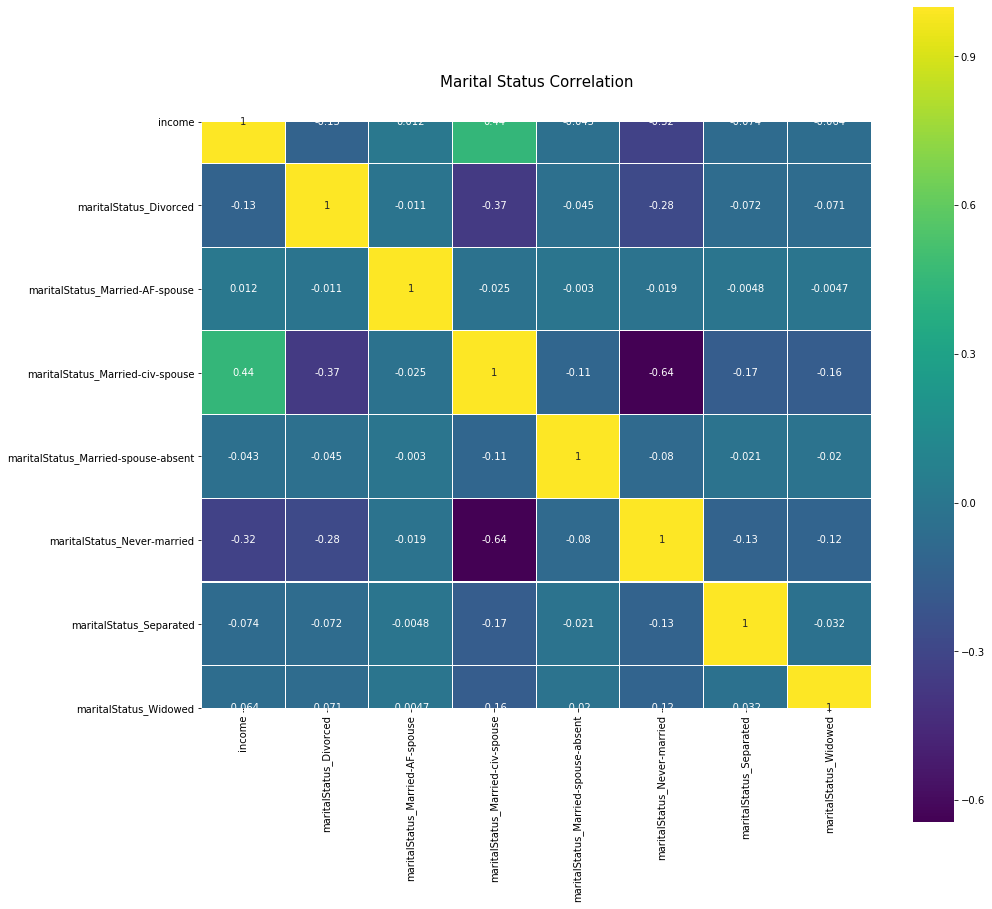

In [33]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Marital Status Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('maritalStatus') | onehot_finaldf.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

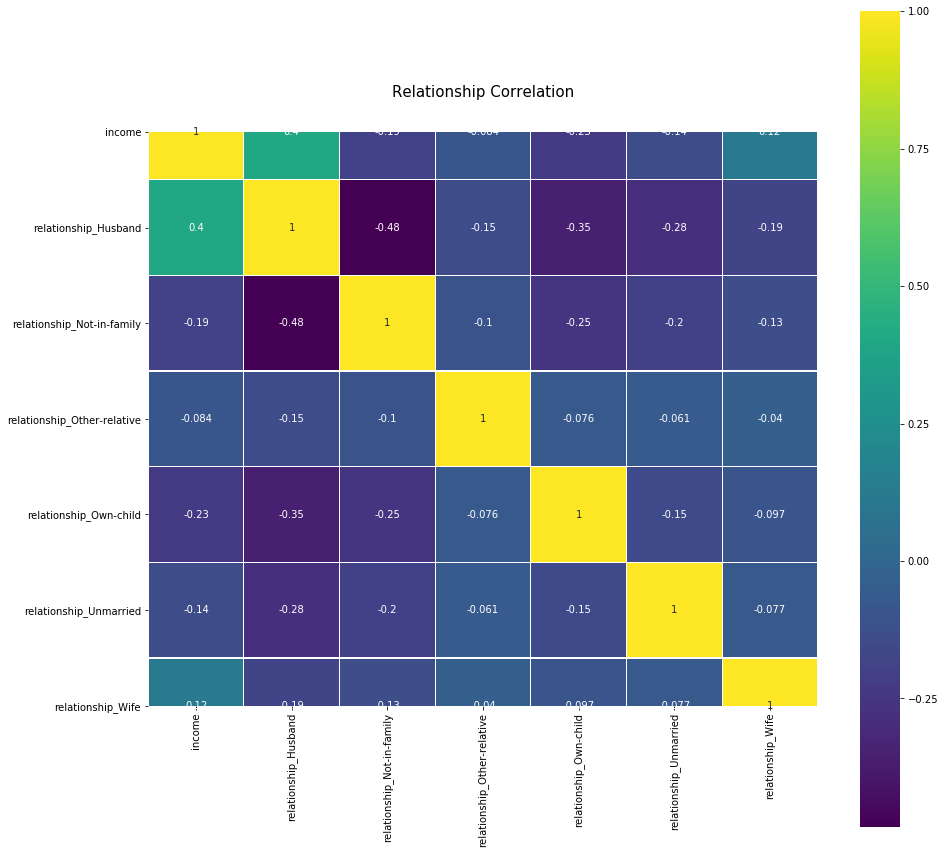

In [34]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Relationship Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('relationship') | onehot_finaldf.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

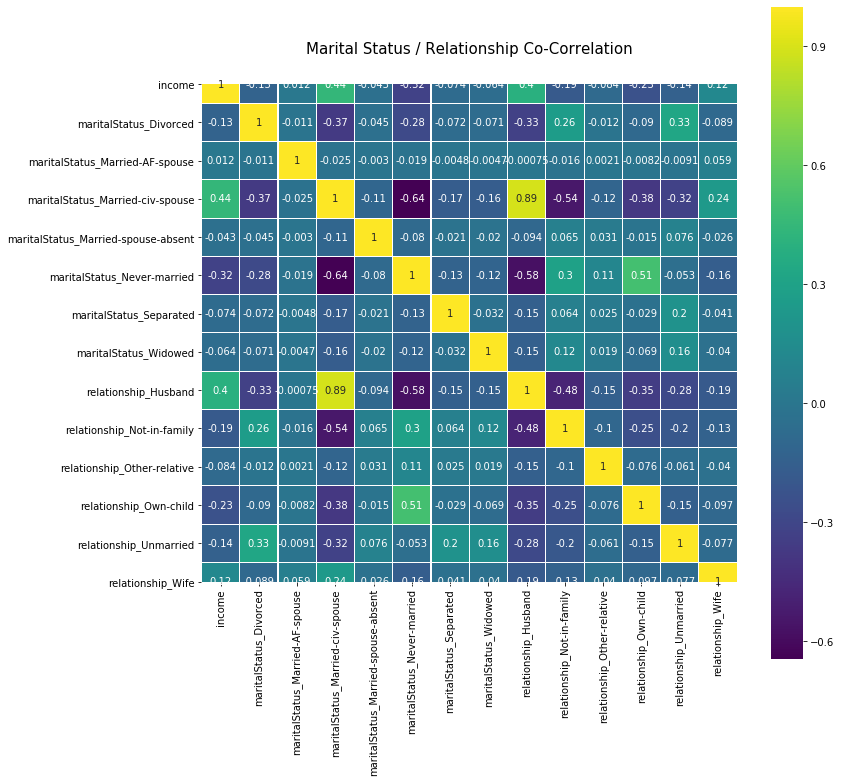

In [35]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Marital Status / Relationship Co-Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('maritalStatus') | onehot_finaldf.columns.str.contains('relationship') | onehot_finaldf.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

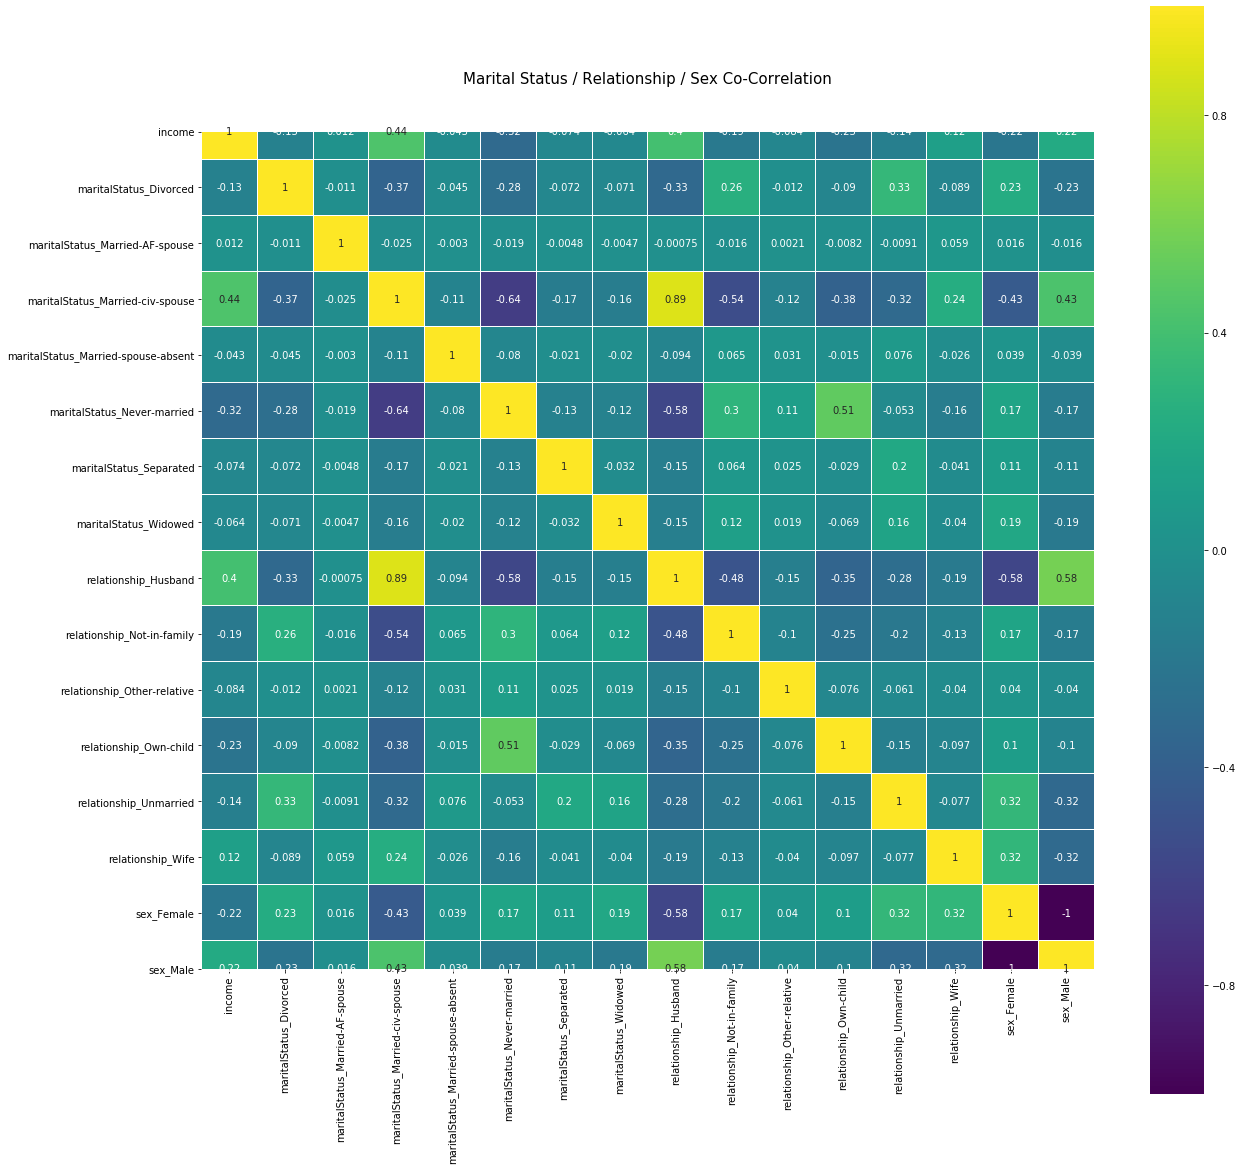

In [36]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Marital Status / Relationship / Sex Co-Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('maritalStatus') | onehot_finaldf.columns.str.contains('relationship') | onehot_finaldf.columns.str.contains('sex') | onehot_finaldf.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [37]:
#Since marital status, sex, and relationship are all co-correlated, 
#we can include only one of the features that makes most sense in the final dataset
#for that reason, let's drop marital status and sex because relationship implies 
#the sex of the person as well the marital status


onehot_finaldf.drop(onehot_finaldf.filter(regex='maritalStatus').columns, axis=1, inplace = True)
onehot_finaldf.drop(onehot_finaldf.filter(regex='sex').columns, axis=1, inplace = True)

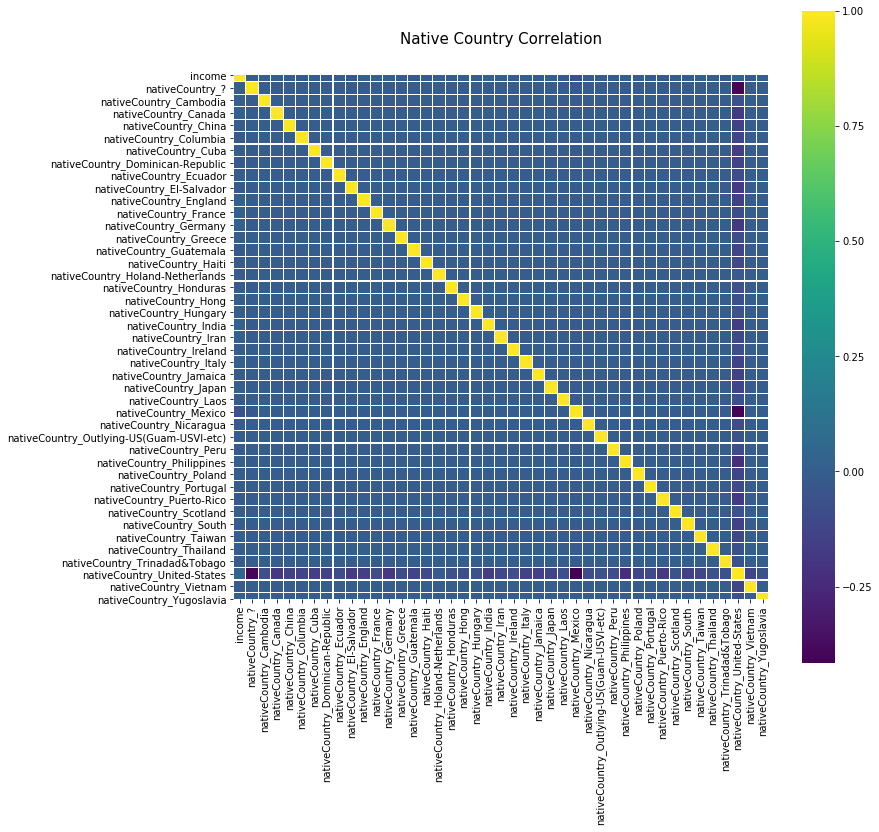

In [38]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Native Country Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('native') | onehot_finaldf.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

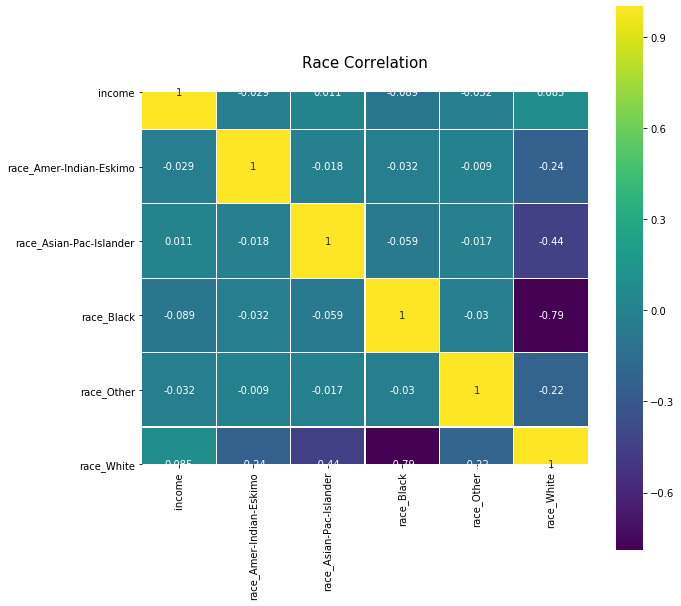

In [142]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Race Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('race') | onehot_finaldf.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

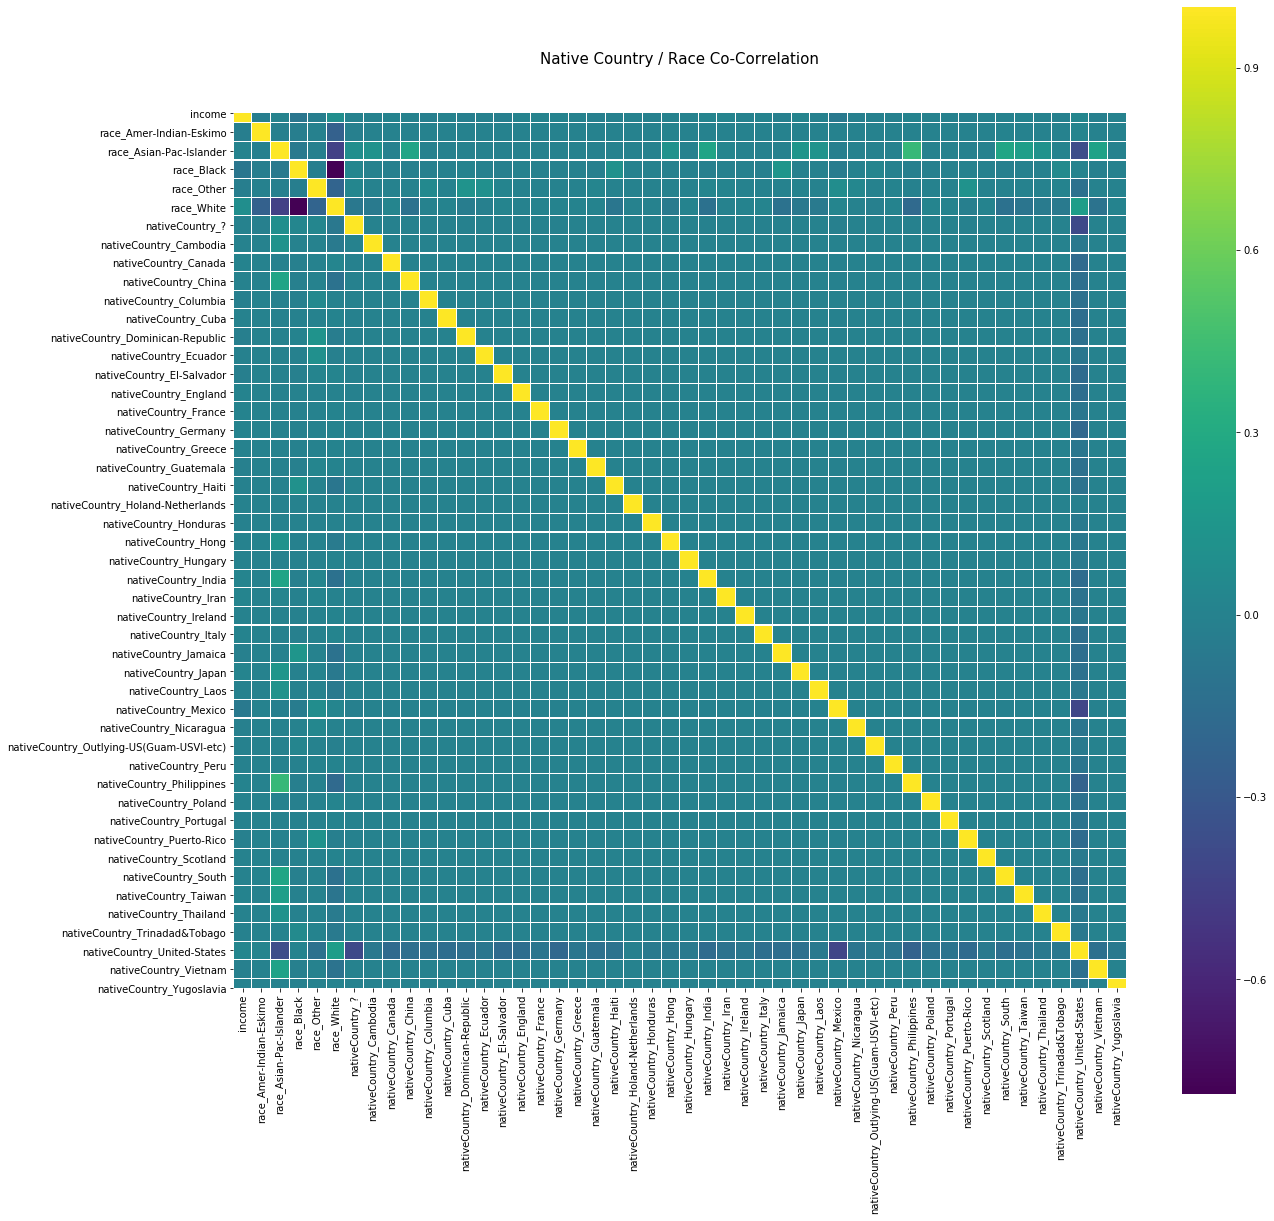

In [40]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Native Country / Race Co-Correlation', y=1.05, size=15)
sns.heatmap(
    onehot_finaldf.loc[:, onehot_finaldf.columns.str.contains('nativeCountry') | onehot_finaldf.columns.str.contains('race') | onehot_finaldf.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [41]:
#race implies native country. drop native country

onehot_finaldf.drop(onehot_finaldf.filter(regex='nativeCountry').columns, axis=1, inplace = True)
onehot_finaldf.head()

,age,educationNum,capitalGain,capitalLoss,hrsPerWeek,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,2174,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,0,0,40,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Final attributes that contribute the income variable:

- age
- educationNum
- capitalGain
- capitalLoss
- hrsPerWeek
- occupation
- relationship
- race

## Data Preprocessing

In [97]:
#we have concluded that the final features that are statistically significant to the income attribute are
# age, educationNum, capitalGain, capitalLoss, hrsPerWeek, occupation, relationship, race

#set up for train and test sets

X = pd.get_dummies(df[['age', 'educationNum', 'capitalGain', 'capitalLoss', 'hrsPerWeek', 'occupation', 'relationship', 'race']], prefix="", prefix_sep="")
X.head()

,age,educationNum,capitalGain,capitalLoss,hrsPerWeek,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,13,2174,0,40,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,9,0,0,40,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [98]:
y = pd.get_dummies(df[['income']], prefix="", prefix_sep="")
y = y.drop(['<=50K'], axis = 1)
y.columns = ['income']

## Testing out some algorithms for Income Prediction

- Decision Tree
- ADABoost Classifier with Decision Trees
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Random Forest Classifier 
- Deep Learning

## Decision Tree

In [143]:
#setting up decision tree

from sklearn.model_selection import train_test_split

#splitting up training and testing set = 70-30

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#create an instance of the DecisionTreeClassifier called incomeTree

incomeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
incomeTree # it shows the default parameters

#fit the data with the training feature matrix X_trainset and training response vector y_trainset

incomeTree.fit(X_trainset,y_trainset)

#make predictions on the test set and store it in predTree

predTree = incomeTree.predict(X_testset)

#EVALUATION
#check accuracy of model

print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree)*100, 2), "%")

DecisionTrees's Accuracy:  84.21 %


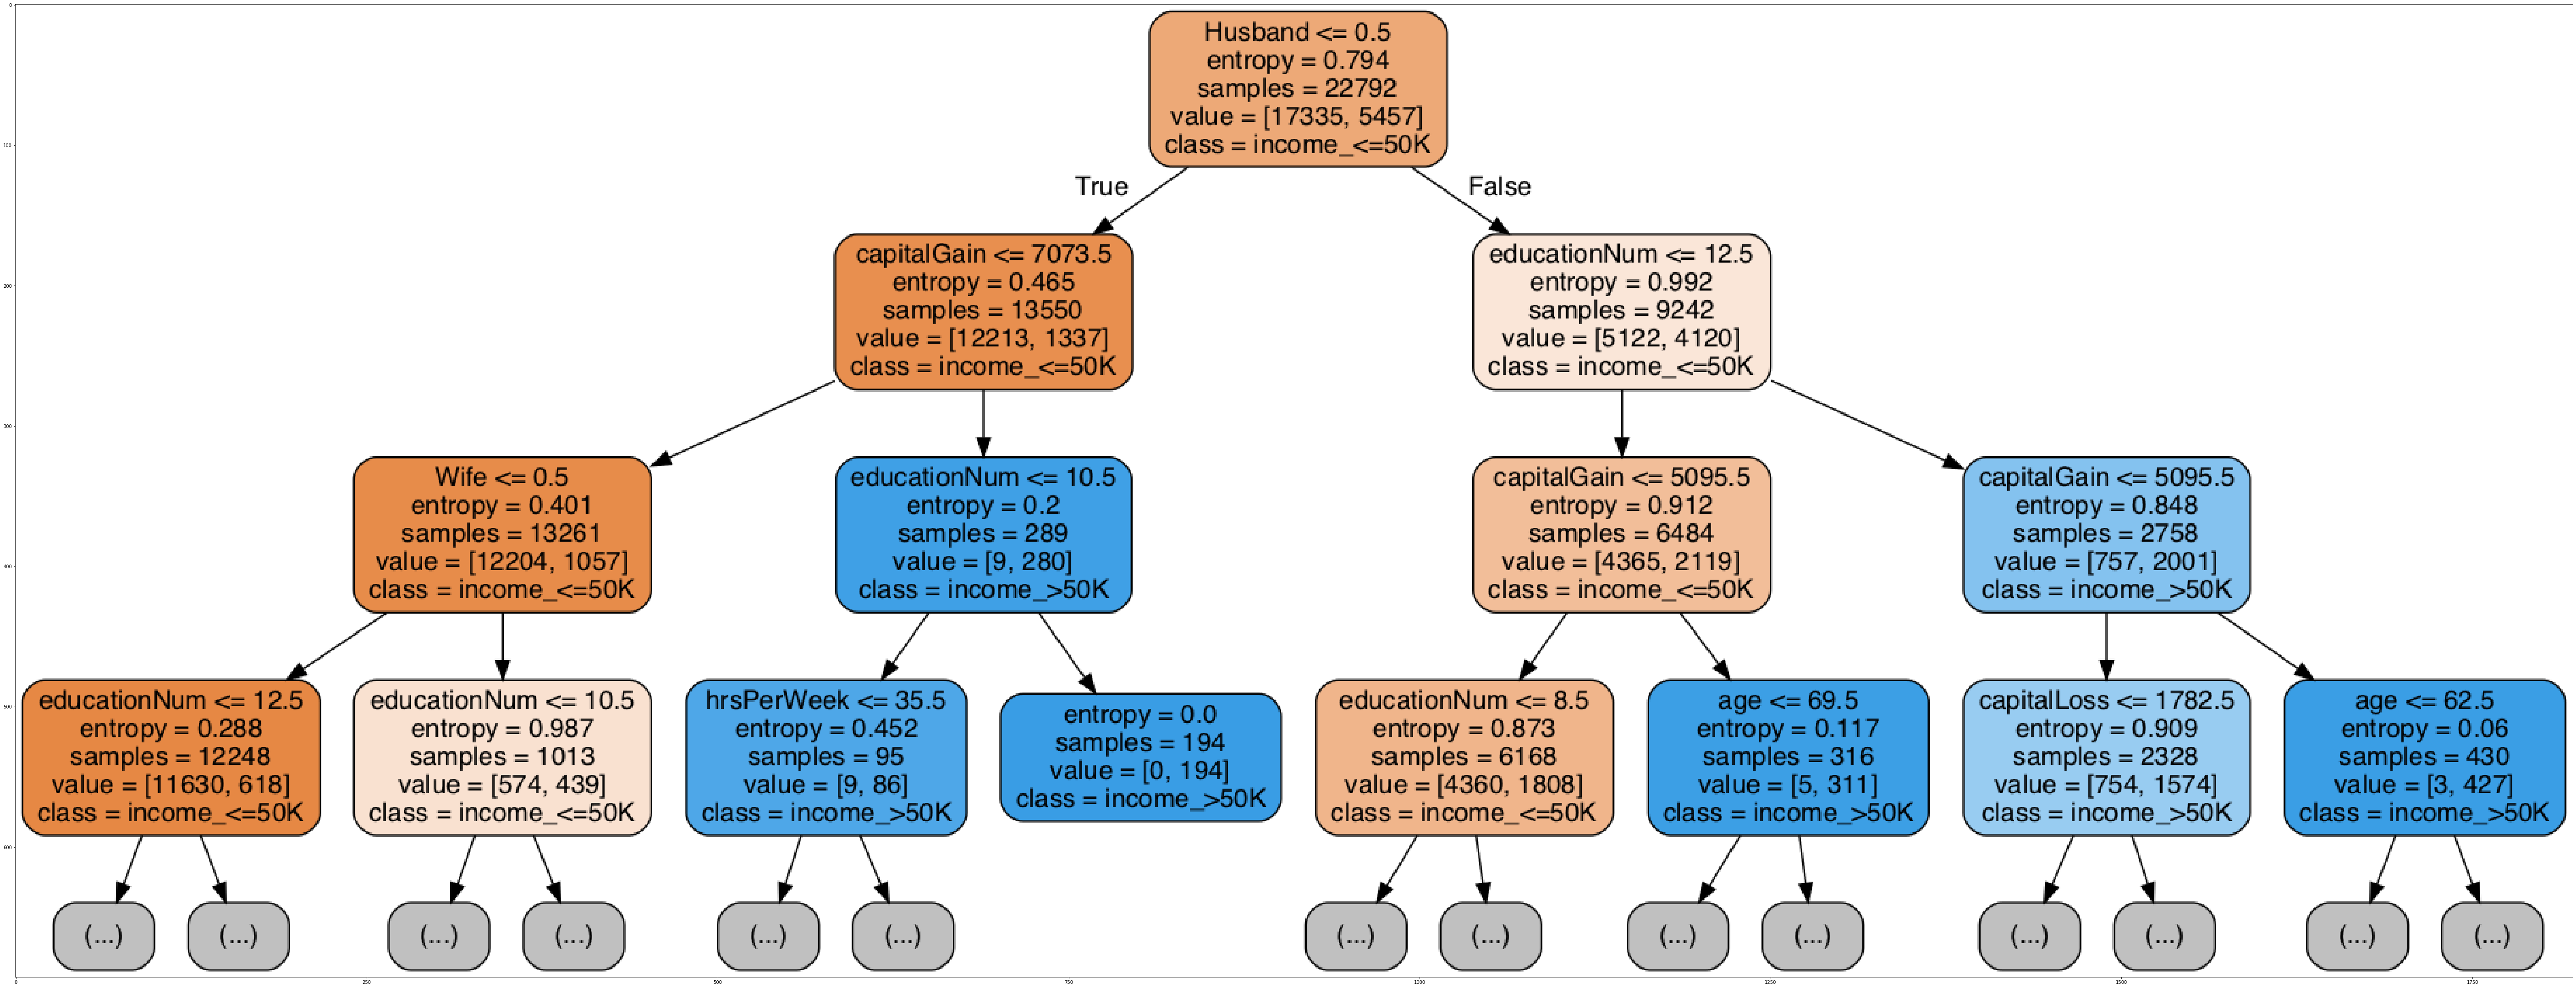

In [117]:
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(incomeTree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = X.columns,
                              class_names = ['income_<=50K', 'income_>50K'],
                              rounded = True,
                              filled= True )

#Convert .dot to .png to allow display in web notebook
check_call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'])
#plt.imshow(mpimg.imread('tree1.png'))
plt.figure(figsize=(100, 200))
plt.imshow(mpimg.imread('tree1.png'),interpolation='nearest')

## ADABoost Classifier with Decision Trees

In [144]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.5, random_state=42)

ABC.fit(X_trainset, y_trainset)

predABC = ABC.predict(X_testset)

print("Ada Boost Classifier Accuracy: ", round(metrics.accuracy_score(y_testset, predABC)*100, 2), "%")

Ada Boost Classifier Accuracy:  86.72 %


## Logistic regression 

## K-Nearest Neighbors (KNN)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_trainset,y_trainset)
predKNN = knn.predict(X_testset)

print("KNN Accuracy: ", round(metrics.accuracy_score(y_testset, predKNN)*100, 2), "%")

KNN Accuracy:  84.82 %


## Support Vector Machines (SVM)

In [56]:
# SVM
from sklearn.svm import LinearSVC
svmModel = LinearSVC()
svmModel.fit(X_trainset, y_trainset)
predSVM = svmModel.predict(X_testset)
#testing

print("SVM Accuracy: ", round(metrics.accuracy_score(y_testset, predSVM)*100, 2), "%")

SVM Accuracy:  79.96 %


## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
RFC.fit(X_trainset, y_trainset)

predRFC = RFC.predict(X_testset)

print("Random Forest Classifier Accuracy: ", round(metrics.accuracy_score(y_testset, predRFC)*100, 2), "%")

Random Forest Classifier Accuracy:  84.83 %


## Deep Learning

### Conclusion